# Data modelling and model building

Building data models to predict pollution

## Data loading and preparation

In [89]:
import pandas as pd
# Load the data
data = pd.read_csv('../Combined data/combined_data_hourly_2023.csv')

data = data.iloc[:, :11].join(data[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data.drop(columns=['Date'], inplace=True)

# Rename column 'celle 11' and 'celle 12' to 'OK' and 'NOK'
data.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidover', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

# Get the structure of the data
print(data.info())

# convert the 'Weekday' Column to be categorical
data['Weekday'] = data['Weekday'].astype('category')

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             8758 non-null   object 
 1   Hour                8758 non-null   int64  
 2   NO2_ppb             8649 non-null   float64
 3   NOx_ppb             8497 non-null   float64
 4   Temp_dry            8757 non-null   float64
 5   Humidity            8757 non-null   float64
 6   wind_speed          8757 non-null   float64
 7   Pressure            8757 non-null   float64
 8   visibility          8758 non-null   float64
 9   Wind_dir            8757 non-null   float64
 10  Traffic east        8758 non-null   float64
 11  Traffic north-east  8758 non-null   float64
 12  Traffic south-east  8758 non-null   float64
 13  Traffic Hvidover    8758 non-null   float64
 14  Traffic north-west  8758 non-null   float64
 15  Traffic south-west  8758 non-null   float64
 16  Traffi

In [90]:
# show the levels of the 'Weekday' column
print(data['Weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


Missing values

Missing values count in each column:
Weekday                 0
Hour                    0
NO2_ppb               109
NOx_ppb               261
Temp_dry                1
Humidity                1
wind_speed              1
Pressure                1
visibility              0
Wind_dir                1
Traffic east            0
Traffic north-east      0
Traffic south-east      0
Traffic Hvidover        0
Traffic north-west      0
Traffic south-west      0
Traffic west            0
dtype: int64


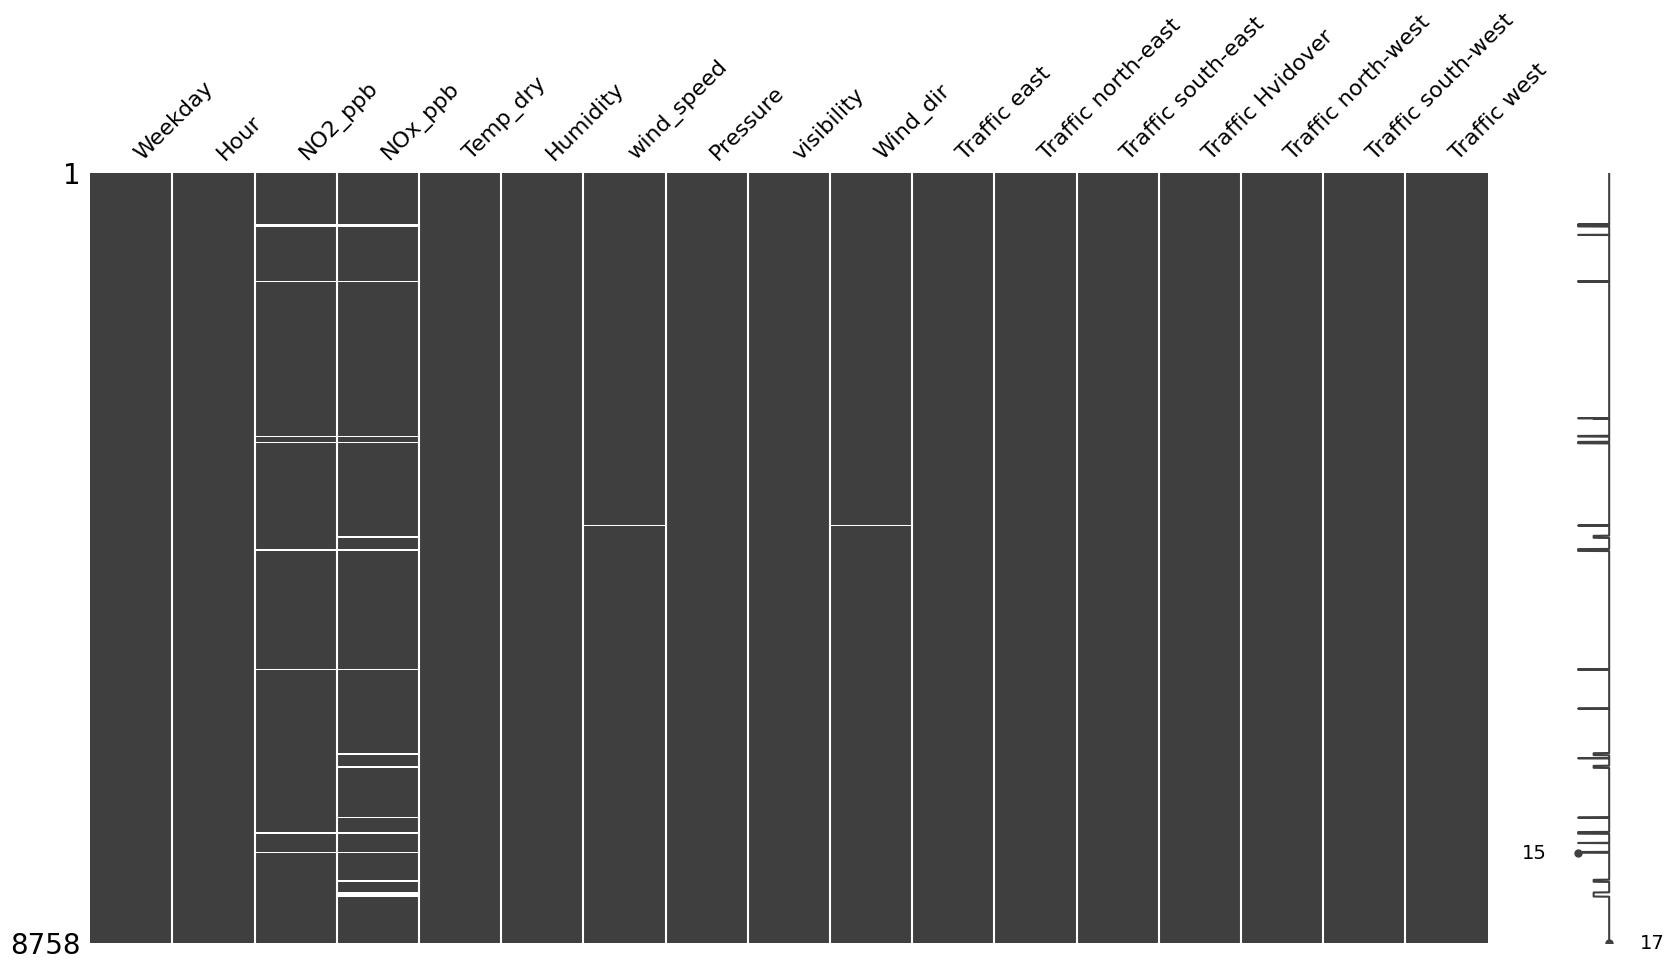

Data after dropping rows with missing values:
Weekday               0
Hour                  0
NO2_ppb               0
NOx_ppb               0
Temp_dry              0
Humidity              0
wind_speed            0
Pressure              0
visibility            0
Wind_dir              0
Traffic east          0
Traffic north-east    0
Traffic south-east    0
Traffic Hvidover      0
Traffic north-west    0
Traffic south-west    0
Traffic west          0
dtype: int64


C:\Users\simon\AppData\Local\Temp\ipykernel_17180\3828886548.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NO2_ppb'].fillna(data['NO2_ppb'].mean(), inplace=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_17180\3828886548.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [91]:
# Count rows with missing values
missing_values_count = data.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Visualize the missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data, figsize=(20, 10))
plt.show()

# Impute the mean for missing values of numerical columns (the following code can be optimized)
data['NO2_ppb'].fillna(data['NO2_ppb'].mean(), inplace=True)
data['NOx_ppb'].fillna(data['NOx_ppb'].mean(), inplace=True)
data['Temp_dry'].fillna(data['Temp_dry'].mean(), inplace=True)
data['wind_speed'].fillna(data['wind_speed'].mean(), inplace=True)
data['Pressure'].fillna(data['Pressure'].mean(), inplace=True)
data['visibility'].fillna(data['visibility'].mean(), inplace=True)
data['Wind_dir'].fillna(data['Wind_dir'].mean(), inplace=True)
data['Humidity'].fillna(data['Humidity'].mean(), inplace=True)
#data.dropna(inplace=True)

missing_values_count = data.isnull().sum()
print("Data after dropping rows with missing values:")
print(missing_values_count)

# Consider using KNN to impute missing values instead.

In [92]:
# Transform the categorical variables into dummy variables
data = pd.get_dummies(data, drop_first=True)
print(data.head())

   Hour   NO2_ppb    NOx_ppb   Temp_dry   Humidity  wind_speed     Pressure  \
0     0  9.609539  14.333718   8.083333  98.500000    5.600000  1000.050000   
1     1  2.431203   2.601390   9.516667  97.500000    6.600000   999.616667   
2     2  1.794863   1.888760  10.200000  95.000000   10.633333   999.666667   
3     3  1.286549   1.169177  10.033333  95.666667   10.300000   999.866667   
4     4  1.020709   0.850521  10.166667  95.000000   10.300000  1000.300000   

    visibility  Wind_dir  Traffic east  ...  Traffic Hvidover  \
0  3600.000000     189.0          3.73  ...              2.80   
1  4250.000000     188.0          1.87  ...              1.87   
2  4550.000000     223.0          0.93  ...              1.87   
3  3566.666667     228.0          0.00  ...              0.93   
4  3650.000000     232.0          0.00  ...              0.00   

   Traffic north-west  Traffic south-west  Traffic west  Weekday_Monday  \
0                4.67                2.80          2.80    

Splitting into training and testing set.

In [93]:
# X and Y. X should be all variables except NO2_ppb, and Y should be NO2_ppb
X = data.drop(columns=['NO2_ppb', 'NOx_ppb'])
y = data['NO2_ppb']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)

# Chronological split, which is possible as the data is already in order
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

Data visualization

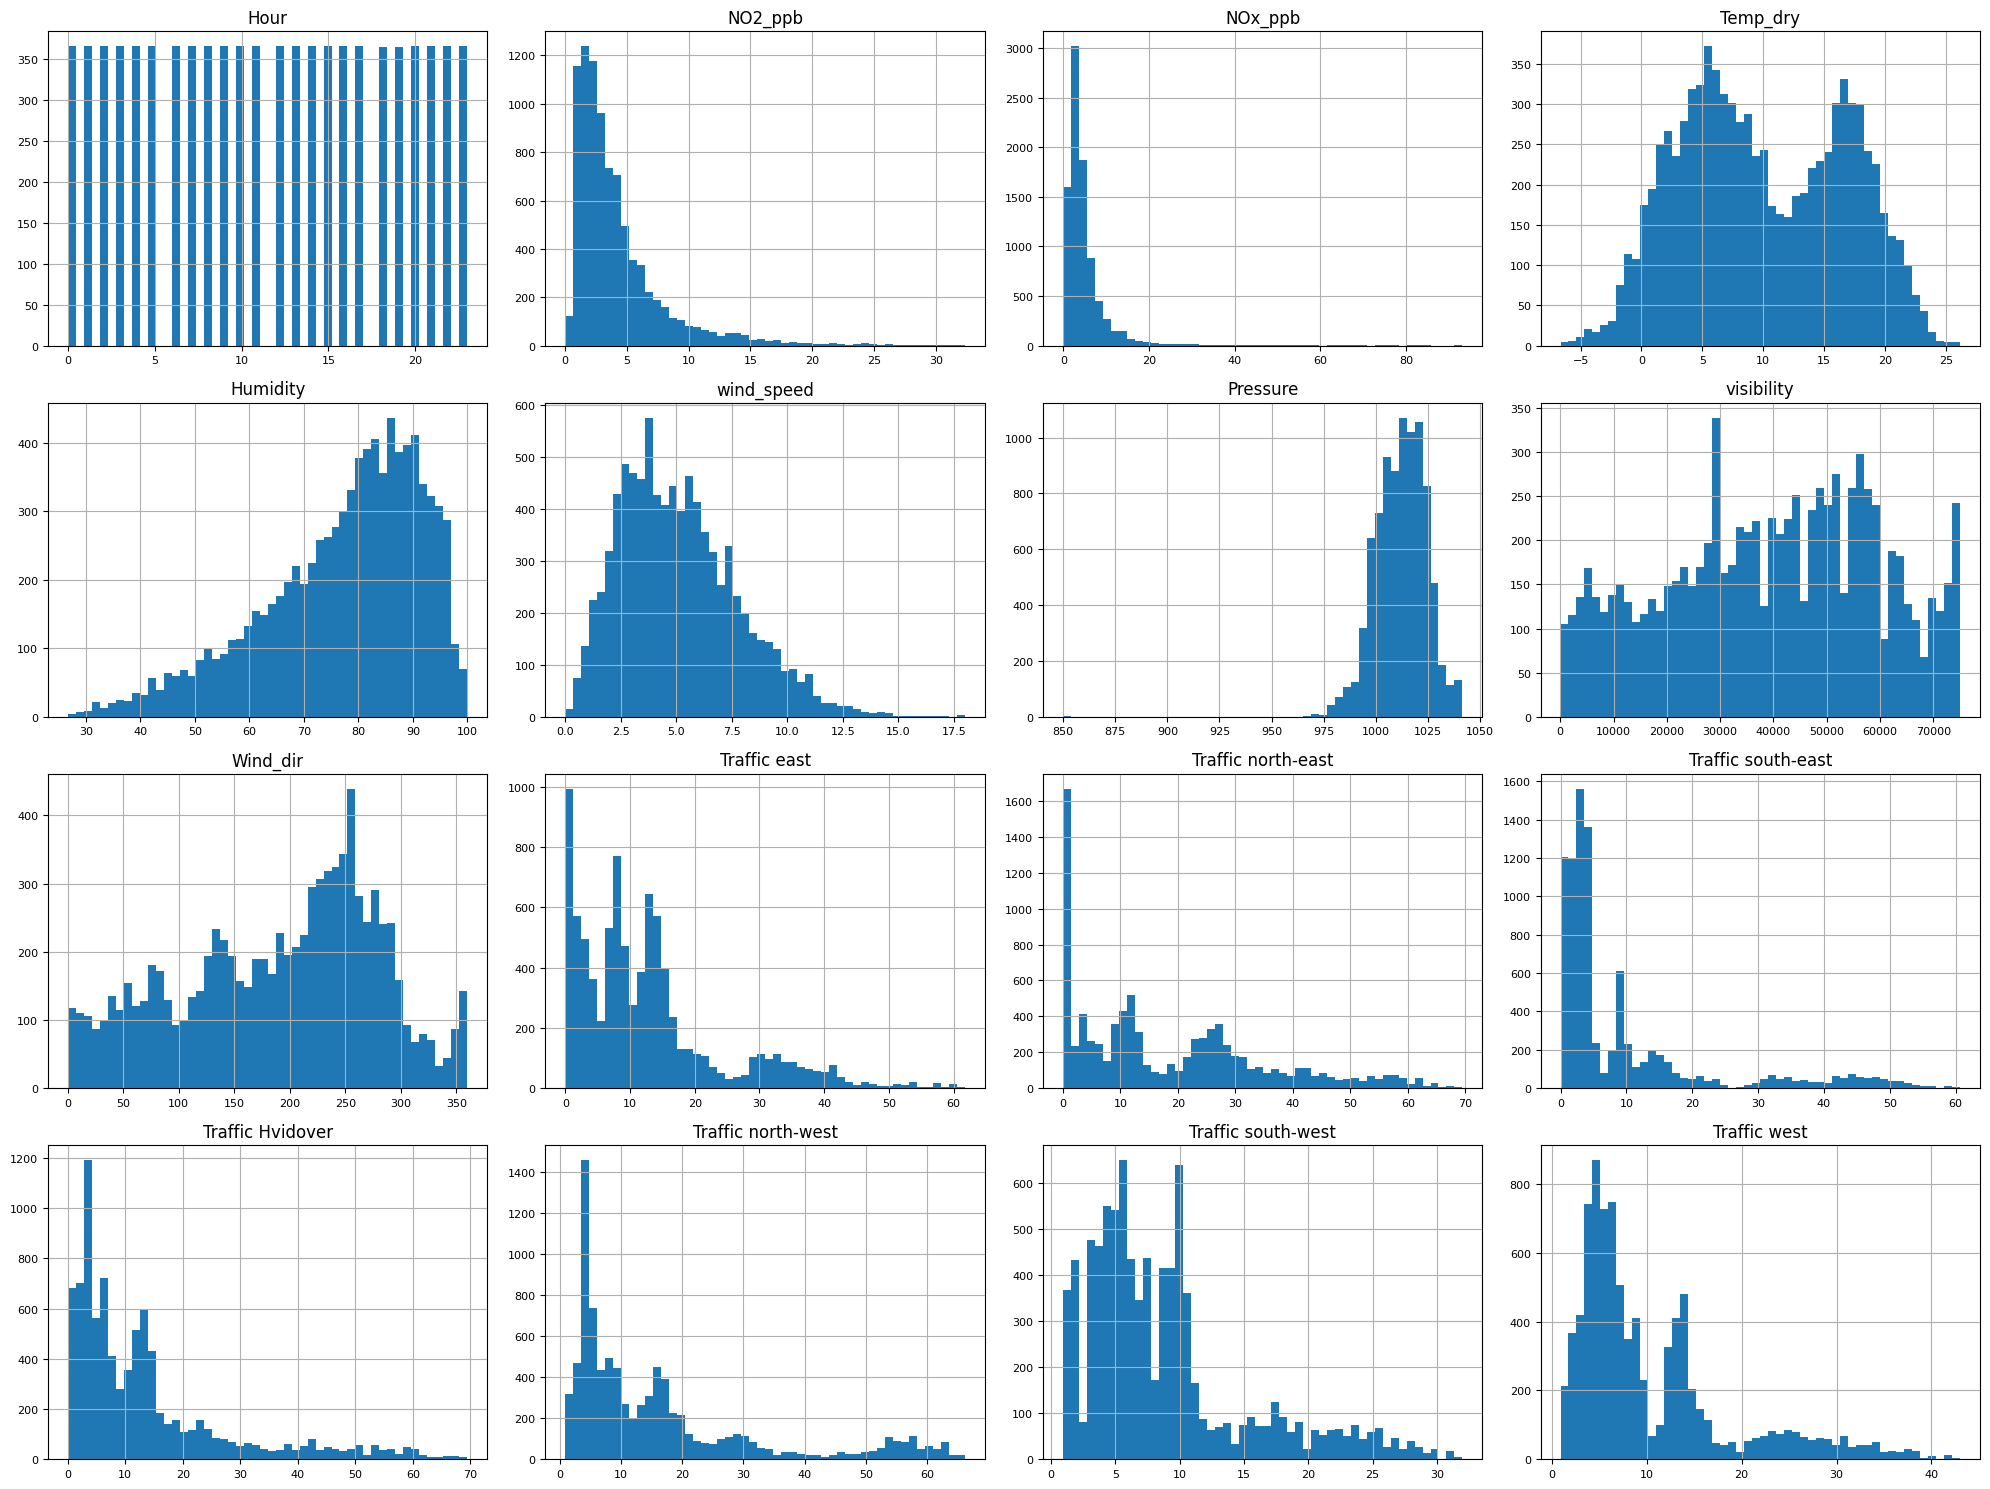

In [94]:
# Visualize the numeric data with histograms
data.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()

## Modelling

### Linear regression

In [96]:
from sklearn.linear_model import LinearRegression    # Requires package scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Mean Squared Error: 9.608882757535763
Coefficients:
Hour: 0.049520670103389876
Temp_dry: -0.16875859243303165
Humidity: 0.020347419410574975
wind_speed: -0.6463380117106752
Pressure: 0.013698161746391066
visibility: -2.756736005521017e-05
Wind_dir: -0.003838352336894813
Traffic east: 0.0059554161819756896
Traffic north-east: -0.03201825700947651
Traffic south-east: -0.031206653378414793
Traffic Hvidover: 0.10239244314269423
Traffic north-west: 0.0010463426722315727
Traffic south-west: 0.12116319341793078
Traffic west: -0.13404905828518468
Weekday_Monday: -0.02490560407482021
Weekday_Saturday: -0.5772639821321264
Weekday_Sunday: -1.3960614491299113
Weekday_Thursday: -0.07149694597183694
Weekday_Tuesday: -0.24543239353908222
Weekday_Wednesday: -0.21417543509644246


### Random forrest

### XGBOOST!!!

In [6]:
import xgboost as xgb
import numpy as np
from xgboost import XGBRegressor  # or XGBClassifier for classification
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=12)

for train_idx, val_idx in tscv.split(X_train):
    X_t, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
    model.fit(X_t, y_t)

    val_pred = model.predict(X_val)
    mse_scores = mean_squared_error(y_val, val_pred)
    print(f"Fold MSE: {mean_squared_error(y_val, val_pred):.2f}")

# Print average MSE
avg_mse = np.mean(mse_scores)
print(f"\nAverage MSE across folds: {avg_mse:.2f}")

Fold MSE: 15.56
Fold MSE: 16.07
Fold MSE: 42.91
Fold MSE: 10.90
Fold MSE: 18.08
Fold MSE: 8.34
Fold MSE: 4.70
Fold MSE: 4.88
Fold MSE: 4.77
Fold MSE: 16.33
Fold MSE: 16.69
Fold MSE: 12.73

Average MSE across folds: 12.73
